### Checking some potential discrepancies in the reanalysis products evaluated on different grids

In [1]:
import so_decadal_variability as so
import numpy as np
import matplotlib.pyplot as plt

In [2]:
timeslice = slice('1980','2018')
ds={}
ds['en4'] = so.process.loaddata('era5','en4',timeslice)
ds['iap'] = so.process.loaddata('era5','iap',timeslice)

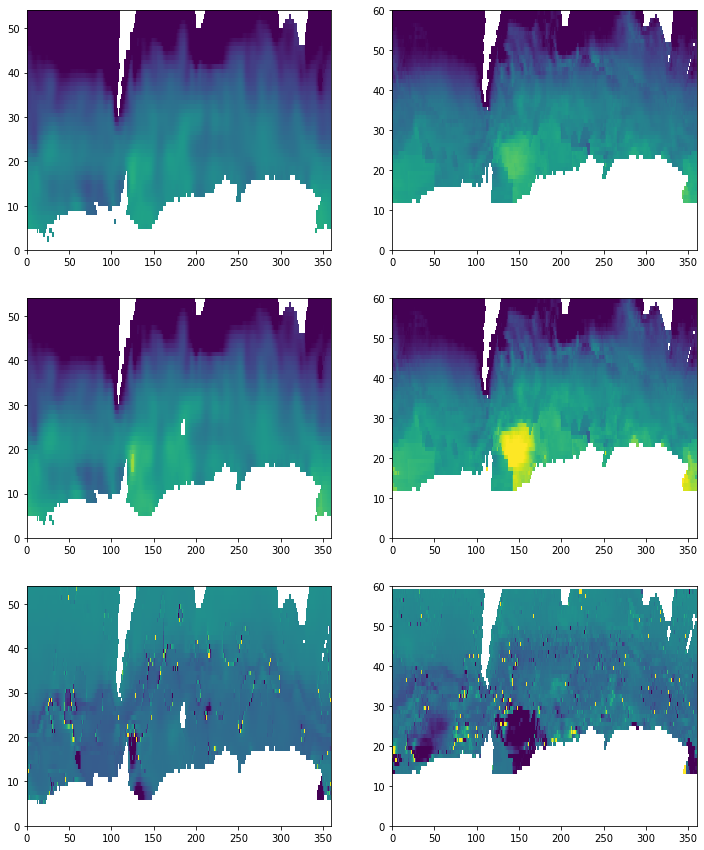

In [3]:
clims = [1026,1029]
t = 10
fig,ax = plt.subplots(ncols=2,nrows=3,figsize=(12,15))
ax[0,0].pcolormesh(ds['en4']['rho'].isel(time=t,depth=0),vmin=clims[0],vmax=clims[1])
ax[0,1].pcolormesh(ds['iap']['rho'].isel(time=t,depth=0),vmin=clims[0],vmax=clims[1])
ax[1,0].pcolormesh(ds['en4']['gamman'].isel(time=t,depth=0),vmin=clims[0],vmax=clims[1])
ax[1,1].pcolormesh(ds['iap']['gamman'].isel(time=t,depth=0),vmin=clims[0],vmax=clims[1])
ax[2,0].pcolormesh(ds['en4']['b'].isel(time=t,depth=0),vmin=0.5,vmax=1.5)
ax[2,1].pcolormesh(ds['iap']['b'].isel(time=t,depth=0),vmin=0.5,vmax=1.5)

# 
# fig,ax = plt.subplots(ncols=2,nrows=3,figsize=(12,15))
# ax[0,0].pcolormesh(ds['en4']['rho'].isel(depth=0).mean('time'),vmin=clims[0],vmax=clims[1])
# ax[0,1].pcolormesh(ds['iap']['rho'].isel(depth=0).mean('time'),vmin=clims[0],vmax=clims[1])
# ax[1,0].pcolormesh(ds['en4']['gamman'].isel(depth=0).mean('time'),vmin=clims[0],vmax=clims[1])
# ax[1,1].pcolormesh(ds['iap']['gamman'].isel(depth=0).mean('time'),vmin=clims[0],vmax=clims[1])
# ax[2,0].pcolormesh(ds['en4']['b'].isel(depth=0).mean('time'),vmin=0.5,vmax=1.5)
# ax[2,1].pcolormesh(ds['iap']['b'].isel(depth=0).mean('time'),vmin=0.5,vmax=1.5)

/home/aos/graemem/miniconda3/envs/so_decadal_variability/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/graemem/miniconda3/envs/so_decadal_variability/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


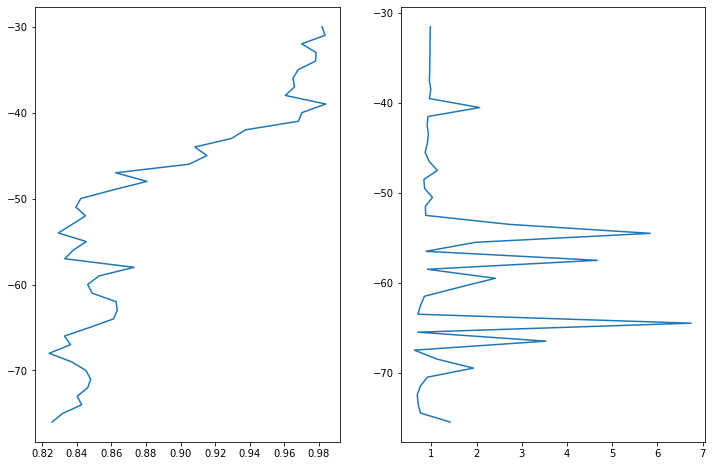

In [101]:
# fig,ax = plt.subplots(ncols=2,figsize=(12,8))
# ax[0].plot(ds['en4']['b'].isel(lon=150,depth=0).transpose(),ds['en4']['lat']);
# ax[1].plot(ds['iap']['b'].isel(lon=150,depth=0).transpose(),ds['iap']['lat']);
fig,ax = plt.subplots(ncols=2,figsize=(12,8))
ax[0].plot(ds['en4']['b'].isel(lon=150,depth=0).mean('time'),ds['en4']['lat']);
ax[1].plot(ds['iap']['b'].isel(lon=150,depth=0).mean('time'),ds['iap']['lat']);

In [92]:
ds['en4']['b'].isel(lon=300,lat=15)

<xarray.DataArray 'b' (time: 468, depth: 42)>
dask.array<getitem, shape=(468, 42), dtype=float64, chunksize=(468, 42), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1980-01-16T12:00:00 ... 2018-12-16T12:00:00
    lon      float32 120.0
    lat      float32 -68.0
  * depth    (depth) float32 5.0215898 15.07854 25.16046 ... 5050.9897 5350.272

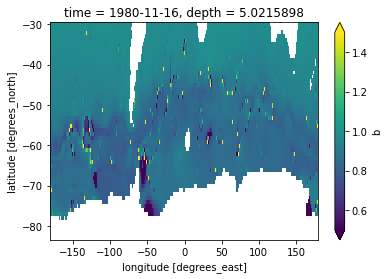

In [65]:
ds['en4']['b'].isel(depth=0,time=10).plot(vmin=0.5,vmax=1.5)

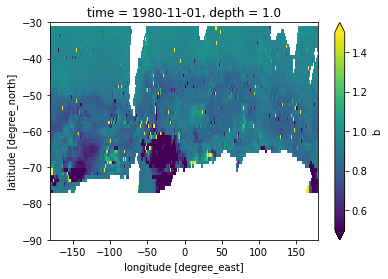

In [4]:
ds['iap']['b'].isel(depth=0,time=10).plot(vmin=0.5,vmax=1.5)

In [33]:
oceannames=['en4','iap']
dsr4d = {}
mask = {}
xgrid = {}
F = {}
Fmean = {}
for oceanname in oceannames:
    ds[oceanname], xgrid[oceanname] = so.grid.get_xgcm(ds[oceanname])
    dsr4d[oceanname] = so.wmt._calc_shortwave_penetration(ds[oceanname],xgrid[oceanname])
    F[fluxname] = so.wmt.calc_densityflux(ds,xgrid)
    Fmean[fluxname] = GridaF[fluxname].sum('depth').mean('time')

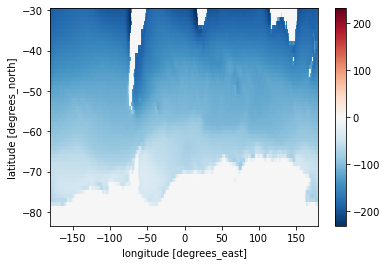

In [55]:
(dsr4d['en4']*ds['en4']['dz']).sum('depth').mean('time').plot()

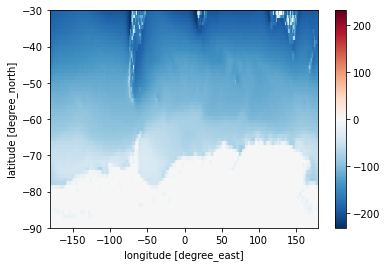

In [56]:
(dsr4d['iap']*ds['iap']['dz']).sum('depth').mean('time').plot()

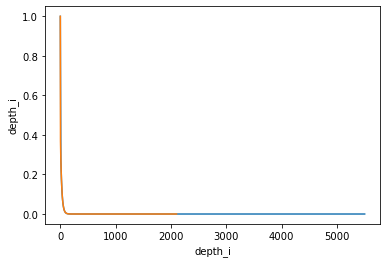

In [53]:
R = 0.58
h1 = 0.35
h2 = 23

# Calculate in 1D
Fps77 = {}
Fps77['en4'] = R*np.exp(-ds['en4']['depth_i']/h1)+(1-R)*np.exp(-ds['en4']['depth_i']/h2)
Fps77['iap'] = R*np.exp(-ds['iap']['depth_i']/h1)+(1-R)*np.exp(-ds['iap']['depth_i']/h2)
Fps77['en4'].plot()
Fps77['iap'].plot()

In [79]:
ds['en4']

<xarray.Dataset>
Dimensions:     (bnds: 2, depth: 42, lat: 54, lon: 360, time: 468)
Coordinates:
  * time        (time) datetime64[ns] 1980-01-16T12:00:00 ... 2018-12-16T12:0...
  * lon         (lon) float32 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
  * lat         (lat) float32 -83.0 -82.0 -81.0 -80.0 ... -32.0 -31.0 -30.0
  * depth       (depth) float32 5.0215898 15.07854 ... 5050.9897 5350.272
Dimensions without coordinates: bnds
Data variables:
    fw          (time, lat, lon) float32 dask.array<chunksize=(468, 54, 360), meta=np.ndarray>
    ht          (time, lat, lon) float32 dask.array<chunksize=(468, 54, 360), meta=np.ndarray>
    sr          (time, lat, lon) float32 dask.array<chunksize=(468, 54, 360), meta=np.ndarray>
    time_bnds   (time, bnds) datetime64[ns] dask.array<chunksize=(468, 2), meta=np.ndarray>
    depth_bnds  (depth, bnds) float32 dask.array<chunksize=(42, 2), meta=np.ndarray>
    alpha       (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    b           (time, depth, lat, lon) float64 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    beta        (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    ct          (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    gamman      (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    pt0         (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    rho         (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    s           (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    sa          (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    sigma0      (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    sigma1      (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    sigma2      (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    sigma3      (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    sigma4      (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    t           (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    cell_area   (lat, lon) float64 dask.array<chunksize=(54, 360), meta=np.ndarray>
    dpth4d      (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    dz4d        (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    lat4d       (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    lon4d       (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    prs4d       (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    vol4d       (time, depth, lat, lon) float32 dask.array<chunksize=(468, 42, 54, 360), meta=np.ndarray>
    dx          (lat, lon) float32 dask.array<chunksize=(54, 360), meta=np.ndarray>
    dy          (lat, lon) float32 dask.array<chunksize=(54, 360), meta=np.ndarray>
    mask        (lat, lon) float64 dask.array<chunksize=(54, 360), meta=np.ndarray>